# Thông tin sinh viên
* Họ tên: Mai Duy Nam
* MSSV: 19120298

# Import thư viện

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style='whitegrid', palette='colorblind')

Giải nén file `data.csv.zip` nếu chưa có file `data.csv`.

In [2]:
!test ! -f data.csv && unzip data.csv.zip

# Nạp dữ liệu

In [3]:
data_df = pd.read_csv('data.csv')
data_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [4]:
features_df = pd.read_csv('featuresdf.csv')
features_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


# Tiền xử lý

## `data_df`

In [5]:
data_df.shape

(3441197, 7)

In [6]:
data_df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region'], dtype='object')

Kiểm tra và loại bỏ các cột chứa giá trị thiếu.

In [7]:
data_df.isna().sum()

Position        0
Track Name    657
Artist        657
Streams         0
URL             8
Date            0
Region          0
dtype: int64

In [8]:
data_df.dropna(inplace=True)

Kiểm tra kiểu dữ liệu của các cột.

In [9]:
data_df.dtypes

Position       int64
Track Name    object
Artist        object
Streams        int64
URL           object
Date          object
Region        object
dtype: object

Chuyển kiểu dữ liệu của cột `Date` từ dạng `string` về `datetime`.

In [10]:
data_df['Date'] = pd.to_datetime(data_df['Date'])

Kiểm tra phân bố giá trị của các cột số.

In [11]:
data_df.describe()

,Position,Streams
count,3.440540e+06,3.440540e+06
mean,9.465220e+01,5.188452e+04
std,5.739412e+01,2.017733e+05
min,1.000000e+00,1.001000e+03
25%,4.500000e+01,3.321000e+03
50%,9.200000e+01,9.226000e+03
75%,1.430000e+02,2.965600e+04
max,2.000000e+02,1.138152e+07


## `features_df`

In [12]:
features_df.shape

(100, 16)

In [13]:
features_df.columns

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [14]:
features_df.isna().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [15]:
features_df.dtypes

id                   object
name                 object
artists              object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

In [16]:
features_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00


# Phân tích và trực quan hóa

## Bài 1: Biểu đồ danh sách các nghệ sĩ có từ 2 bài hát đạt top

In [17]:
# Ở đây hiểu bài hát đạt top là bài hát từng có thứ hạng nằm trong
# top 100 ở bất kỳ bảng xếp hạng nào
artist_top_count_df = data_df[(data_df['Position'] >= 1) & (data_df['Position'] <= 100)]\
                      .groupby('Artist')['Track Name']\
                      .nunique()\
                      .to_frame()\
                      .reset_index()

# Đổi tên cột Track Name
artist_top_count_df.rename(
    columns={'Track Name': 'Top Track Count'},
    inplace=True
)

artist_top_count_df = artist_top_count_df[artist_top_count_df['Top Track Count'] >= 2]\
                      .sort_values(by='Top Track Count', ascending=False)
artist_top_count_df.head()

,Artist,Top Track Count
1624,Jul,52
919,Ed Sheeran,45
653,Coldplay,44
1927,Linkin Park,41
1138,Future,38


Top 30 nghệ sĩ có số bài hát đạt top nhiều nhất.

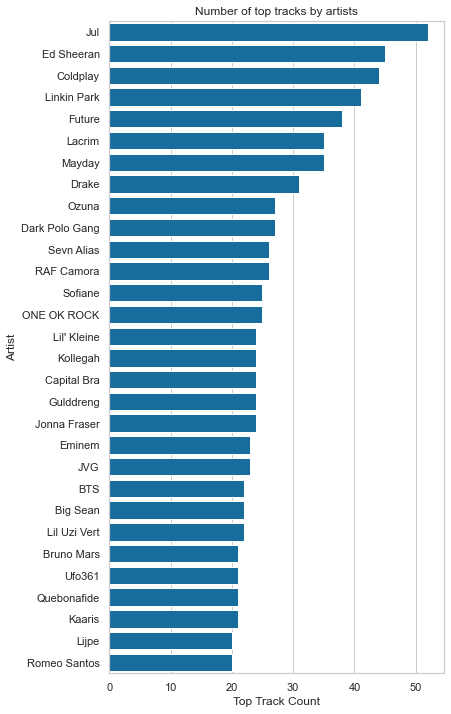

In [18]:
fig, ax = plt.subplots(figsize=(6, 12))
sns.barplot(y='Artist', x='Top Track Count', data=artist_top_count_df[:30], ax=ax, color='b', orient='h')
ax.set_title('Number of top tracks by artists')
plt.show()

## Bài 2: Tìm số lần các bài hát của Ed Sheeran nằm trong top 100 ở bảng xếp hạng Mỹ

Biến `ed_us_top_songs` chứa các bài hát của Ed Sheeran đã từng lọt vào top 100 bảng xếp hạng Mỹ.

In [19]:
ed_us_top_songs = data_df[(data_df['Artist'] == 'Ed Sheeran') &\
                          (data_df['Region'] == 'us') &\
                          (data_df['Position'] >= 1) & (data_df['Position'] <= 100)]

ed_us_top_songs.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
772622,1,Shape of You,Ed Sheeran,1517787,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,us
772623,2,Castle on the Hill,Ed Sheeran,1472037,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,2017-01-06,us
772711,90,Photograph,Ed Sheeran,240747,https://open.spotify.com/track/6fxVffaTuwjgEk5...,2017-01-06,us
772721,100,Thinking Out Loud,Ed Sheeran,225907,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2017-01-06,us
772822,1,Shape of You,Ed Sheeran,1437473,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-07,us


Tìm số lần các bài hát đạt top bằng cách đếm theo ngày.

In [20]:
ed_us_top_songs_count = ed_us_top_songs.groupby('Track Name')['Date'].count().sort_values(ascending=False)
ed_us_top_songs_count

Track Name
Shape of You                           364
Perfect                                148
Castle on the Hill                     104
Galway Girl                             62
Perfect Duet (Ed Sheeran & Beyoncé)     39
Happier                                 35
Dive                                    31
New Man                                 22
How Would You Feel (Paean)              20
What Do I Know?                         19
Supermarket Flowers                     17
Barcelona                               17
Nancy Mulligan                          16
Hearts Don't Break Around Here          15
Bibia Be Ye Ye                          14
Save Myself                             14
Eraser                                  14
Thinking Out Loud                        6
Photograph                               5
Name: Date, dtype: int64

## Bài 3: Vẽ biểu đồ diễn biến bảng xếp hạng của bài Shape of You của tác giả Ed Sheeran trong top 100 ở Mỹ. Mở rộng: diễn biến các bài hát của Ed Sheeran trong top 100 ở Mỹ.

### Diễn biến bảng xếp hạng của bài hát Shape of You

In [21]:
soy = ed_us_top_songs[ed_us_top_songs['Track Name'] == 'Shape of You']
soy_rank_progress = soy[['Date', 'Position']].sort_values(by='Date')
soy_rank_progress.head()

,Date,Position
772622,2017-01-06,1
772822,2017-01-07,1
773022,2017-01-08,1
773222,2017-01-09,1
773423,2017-01-10,2


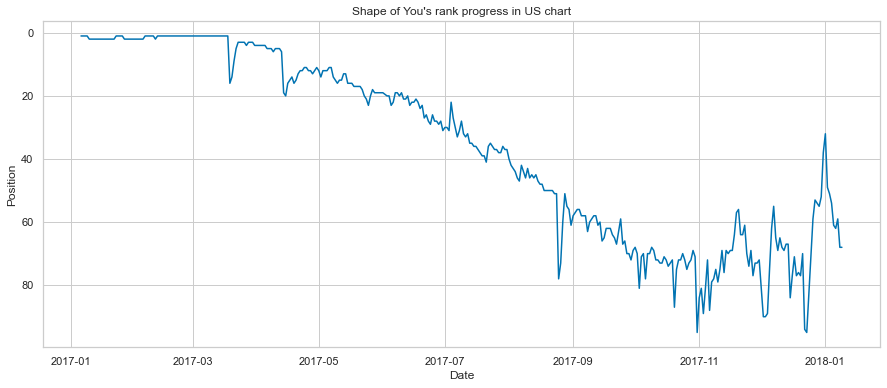

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=soy_rank_progress, x='Date', y='Position', ax=ax)

ax.invert_yaxis()
ax.set_xlabel('Date')
ax.set_ylabel('Position')
ax.set_title('Shape of You\'s rank progress in US chart')
plt.show()

### Diễn biến bảng xếp hạng của các bài hát của Ed Sheeran

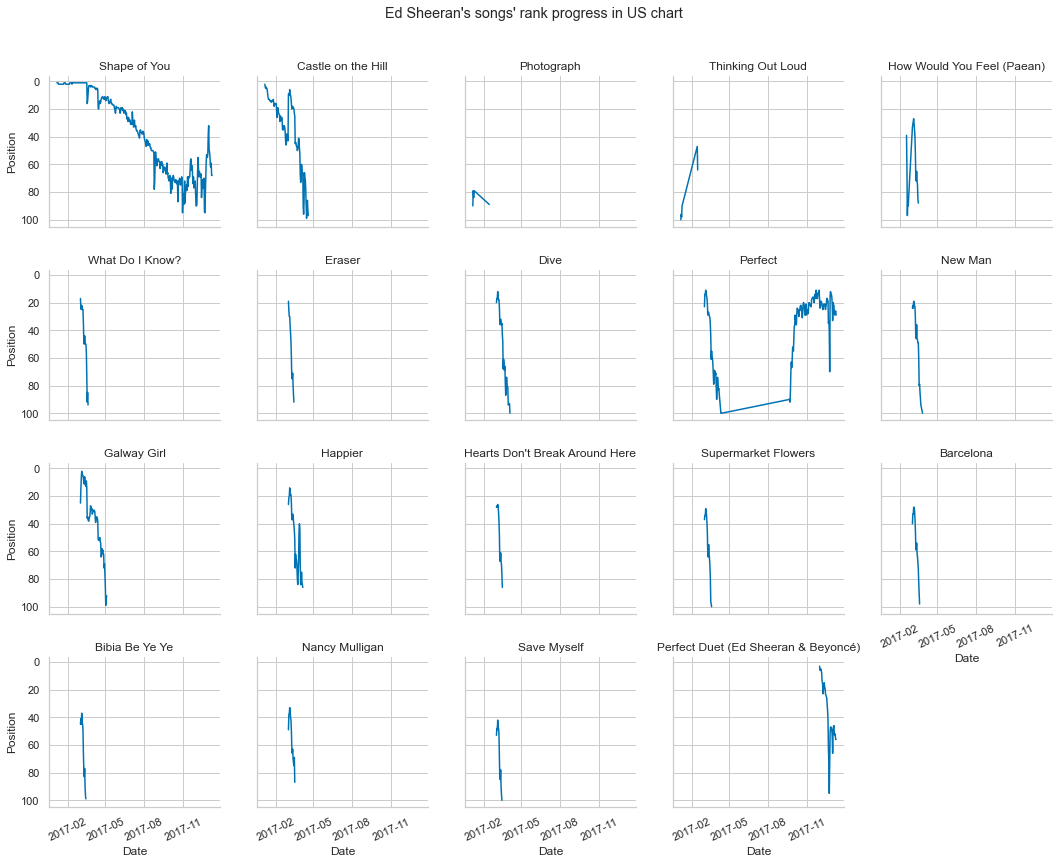

In [23]:
g = sns.FacetGrid(data=ed_us_top_songs[['Date', 'Position', 'Track Name']], col='Track Name', col_wrap=5)
g.map(sns.lineplot, 'Date', 'Position')


plt.gca().invert_yaxis()
for ax in g.axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    for xticklabel in ax.get_xticklabels():
        xticklabel.set_rotation(25)
        
g.set_titles(col_template='{col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ed Sheeran\'s songs\' rank progress in US chart')
plt.show()